# Surface inversion for the entire Columbia Basin 
### with in situ average SMB gradient and optimized Glen's A

In [1]:
# Python imports
import logging

# Libs
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as shpg

# Locals
from oggm import cfg, utils, workflow, tasks, graphics
from oggm.workflow import execute_entity_task, gis_prepro_tasks, climate_tasks

# For timing the run
import time
start = time.time()

# Module logger
log = logging.getLogger(__name__)

# Initialize OGGM and set up the run parameters --> Read the configuration file containing the run’s parameters.
cfg.initialize(logging_level='WORKFLOW')
rgi_version = '60' #61 
rgi_region = '02'  # Region WNA

cfg.PARAMS['border'] = 10
cfg.PARAMS['continue_on_error'] = True
cfg.PATHS['working_dir'] = utils.get_temp_dir('CB_all', reset=True)

#Glen's A
A=4.82e-24                ## leave-one-out range: 2.39e-24 to 8.08e-24
cfg.PARAMS['inversion_glen_a'] =A              # 4.82e-24 #6.37e-24  #5.08e-24 
cfg.PARAMS['glen_a'] = A                       #4.82e-24          # 6.37e-24 #5.08e-24 
cfg.PARAMS['smoothing_window'] = 251.

### VAS model params
# area-volume scaling parameters for glaciers (cp. Marzeion et. al., 2012)
# units: m^(3-2*gamma) and unitless, respectively
# cfg.PARAMS['vas_c_area_m2'] = 0.064
# cfg.PARAMS['vas_gamma_area'] = 1.083

# RGI file
path = utils.get_rgi_region_file(rgi_region, version=rgi_version)
rgidf = gpd.read_file(path)

# Get the Columbia Basin file
path = '/home/pelto/GIS/BCProv/CBT/cbt_basin_84.shp'
basin = gpd.read_file(path)

# Take all glaciers in the Columbia Basin
in_bas = [basin.geometry.contains(shpg.Point(x, y))[0] for
          (x, y) in zip(rgidf.CenLon, rgidf.CenLat)]
rgidf = rgidf.loc[in_bas]

# Sort for more efficient parallel computing
rgidf = rgidf.sort_values('Area', ascending=False)

log.workflow('Starting OGGM run')
log.workflow('Number of glaciers: {}'.format(len(rgidf)))

# gdirs = workflow.init_glacier_regions(rgidf)
gdirs = workflow.init_glacier_directories(rgidf)
workflow.execute_entity_task(tasks.define_glacier_region, gdirs)
workflow.gis_prepro_tasks(gdirs)
workflow.climate_tasks(gdirs)
workflow.inversion_tasks(gdirs)
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);

# Log
m, s = divmod(time.time() - start, 60)
h, m = divmod(m, 60)
log.workflow('OGGM is done! Time needed: %d:%02d:%02d' % (h, m, s))

2020-07-16 09:40:37: oggm.cfg: Using configuration file: /home/pelto/anaconda2/envs/oggm_pub/lib/python3.7/site-packages/oggm/params.cfg
2020-07-16 09:40:37: oggm.cfg: Multiprocessing switched ON according to the parameter file.
2020-07-16 09:40:37: oggm.cfg: Multiprocessing: using all available processors (N=8)
2020-07-16 09:40:43: oggm.cfg: PARAMS['border'] changed from `20` to `10`.
2020-07-16 09:40:43: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2020-07-16 09:40:43: oggm.cfg: PARAMS['inversion_glen_a'] changed from `2.4e-24` to `4.82e-24`.
2020-07-16 09:40:43: oggm.cfg: PARAMS['glen_a'] changed from `2.4e-24` to `4.82e-24`.
2020-07-16 09:40:43: oggm.cfg: WARNING: adding an unknown parameter `smoothing_window`:`251.0` to PARAMS.
2020-07-16 09:40:52: __main__: Starting OGGM run
2020-07-16 09:40:52: __main__: Number of glaciers: 2083
2020-07-16 09:43:18: oggm.workflow: Execute entity task define_glacier_region on 2083 glaciers
2020-07-16 09:43:49: oggm.workfl

2020-07-16 09:45:38: oggm.core.centerlines: FileNotFoundError occurred during task catchment_area on RGI60-02.06153: [Errno 2] No such file or directory: '/tmp/OGGM/CB_all/per_glacier/RGI60-02/RGI60-02.06/RGI60-02.06153/centerlines.pkl'
2020-07-16 09:45:55: oggm.core.centerlines: FileNotFoundError occurred during task catchment_area on RGI60-02.03976: [Errno 2] No such file or directory: '/tmp/OGGM/CB_all/per_glacier/RGI60-02/RGI60-02.03/RGI60-02.03976/centerlines.pkl'
2020-07-16 09:45:59: oggm.core.centerlines: FileNotFoundError occurred during task catchment_area on RGI60-02.04146: [Errno 2] No such file or directory: '/tmp/OGGM/CB_all/per_glacier/RGI60-02/RGI60-02.04/RGI60-02.04146/centerlines.pkl'
2020-07-16 09:46:05: oggm.core.centerlines: FileNotFoundError occurred during task catchment_area on RGI60-02.12432: [Errno 2] No such file or directory: '/tmp/OGGM/CB_all/per_glacier/RGI60-02/RGI60-02.12/RGI60-02.12432/centerlines.pkl'
2020-07-16 09:46:06: oggm.workflow: Execute entity t

2020-07-16 09:54:48: oggm.core.inversion: FileNotFoundError occurred during task mass_conservation_inversion on RGI60-02.12432: [Errno 2] No such file or directory: '/tmp/OGGM/CB_all/per_glacier/RGI60-02/RGI60-02.12/RGI60-02.12432/inversion_input.pkl'
2020-07-16 09:54:48: oggm.workflow: Execute entity task filter_inversion_output on 2083 glaciers
2020-07-16 09:54:48: oggm.core.inversion: FileNotFoundError occurred during task filter_inversion_output on RGI60-02.06153: [Errno 2] No such file or directory: '/tmp/OGGM/CB_all/per_glacier/RGI60-02/RGI60-02.06/RGI60-02.06153/inversion_output.pkl'
2020-07-16 09:54:48: oggm.core.inversion: FileNotFoundError occurred during task filter_inversion_output on RGI60-02.03976: [Errno 2] No such file or directory: '/tmp/OGGM/CB_all/per_glacier/RGI60-02/RGI60-02.03/RGI60-02.03976/inversion_output.pkl'
2020-07-16 09:54:48: oggm.core.inversion: FileNotFoundError occurred during task filter_inversion_output on RGI60-02.04146: [Errno 2] No such file or dir

2020-07-16 09:58:45: oggm.core.inversion: KeyError occurred during task distribute_thickness_per_altitude on RGI60-02.04146: 'glacier_mask'
2020-07-16 09:59:26: oggm.core.gis: KeyError occurred during task gridded_attributes on RGI60-02.12432: 'glacier_mask'
2020-07-16 09:59:26: oggm.core.inversion: KeyError occurred during task distribute_thickness_per_altitude on RGI60-02.12432: 'glacier_mask'


In [2]:
utils.compile_glacier_statistics(gdirs, filesuffix='_default', path=True)
import os
WORKING_DIR = cfg.PATHS['working_dir']
ds_default = pd.read_csv(os.path.join(WORKING_DIR, 'glacier_statistics_default.csv'), index_col=0)
ds_default

2020-07-16 09:56:34: oggm.workflow: Execute entity task glacier_statistics on 2083 glaciers


,rgi_region,rgi_subregion,name,cenlon,cenlat,rgi_area_km2,glacier_type,terminus_type,status,inv_volume_km3,...,flowline_mean_elev,flowline_max_elev,flowline_min_elev,flowline_avg_width,flowline_avg_slope,t_star,mu_star_glacierwide,mu_star_flowline_avg,mu_star_allsame,mb_bias
rgi_id,,,,,,,,,,,,,,,,,,,,,
RGI60-02.06860,2,02-03,NaN,-117.866,52.1689,43.951,Glacier,Land-terminating,Glacier or ice cap,4.302169,...,2475.488096,2954.897683,1384.646446,2863.817033,0.171461,1959.0,91.859120,91.871558,False,321.890237
RGI60-02.06859,2,02-03,NaN,-117.759,52.1779,33.983,Glacier,Land-terminating,Glacier or ice cap,4.377416,...,2508.111600,3075.213427,1454.420662,2280.126141,0.139053,1959.0,91.324812,91.419758,False,321.816685
RGI60-02.06862,2,02-03,NaN,-117.880,52.2096,20.588,Glacier,Land-terminating,Glacier or ice cap,2.083705,...,2421.297680,3042.823068,1657.770829,1932.057057,0.186119,1959.0,84.557783,84.557783,True,321.986809
RGI60-02.05099,2,02-03,NaN,-116.553,51.6181,17.854,Glacier,Land-terminating,Glacier or ice cap,2.010158,...,2611.748215,3096.225504,2092.733022,1990.412486,0.113388,1961.0,100.464378,100.473996,False,309.054677
RGI60-02.02171,2,02-03,NaN,-116.930,50.8069,16.898,Glacier,Land-terminating,Glacier or ice cap,1.548516,...,2547.653771,3151.528225,1877.053638,2004.032258,0.190636,1962.0,115.426548,115.457180,False,290.486245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RGI60-02.07136,2,02-03,NaN,-118.278,52.3394,0.050,Glacier,Land-terminating,Glacier or ice cap,0.001718,...,2468.027642,2547.841244,2419.591275,153.846154,0.200139,1958.0,94.458753,94.458753,True,323.483128
RGI60-02.00620,2,02-03,NaN,-116.728,50.1607,0.050,Glacier,Land-terminating,Glacier or ice cap,0.000910,...,2669.525540,2720.417547,2640.424503,320.512821,0.267560,1965.0,120.890790,120.890790,True,248.194852
RGI60-02.02114,2,02-03,NaN,-116.835,50.8079,0.050,Glacier,Land-terminating,Glacier or ice cap,0.000928,...,2610.422367,2694.840983,2530.612644,226.244344,0.369813,1962.0,128.470026,128.470026,True,290.117955


In [3]:
print(ds_default.inv_volume_km3.sum())
print(ds_default.vas_volume_km3.sum())
print(ds_default.rgi_area_km2.sum())

109.98871511817222
96.93973604384959
1753.906


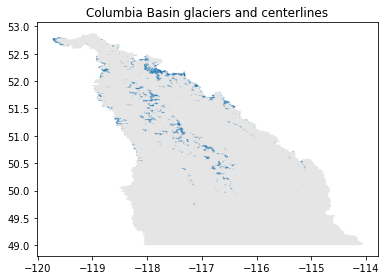

In [4]:
# utils.write_centerlines_to_shape(gdirs)
# centerlines = gpd.read_file(os.path.join(WORKING_DIR, 'glacier_centerlines.shp'))

f, ax = plt.subplots()
basin.plot(ax=ax, color='grey', alpha=0.2)
rgidf.plot(ax=ax, color='C0')
# centerlines.plot(ax=ax, color='C3')
plt.title('Columbia Basin glaciers and centerlines')
plt.tight_layout()
# plt.savefig(WORKING_DIR + 'Columbia_Basin.pdf', resolution=300)
plt.show()

In [5]:
# Print the standard MB gradient from OGGM default
from oggm.core.massbalance import ConstantMassBalance, MultipleFlowlineMassBalance

In [6]:
# See the result of the inversion
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);

2020-07-16 09:56:48: oggm.workflow: Execute entity task distribute_thickness_per_altitude on 2083 glaciers


In [7]:
# Let's apply a linear MB instead
from oggm.core.climate import apparent_mb_from_linear_mb

grad = 7.73 #6.43 mm w.e. m-1 from all glaciological point data

workflow.execute_entity_task(tasks.apparent_mb_from_linear_mb, gdirs, mb_gradient=grad);

2020-07-16 09:58:02: oggm.workflow: Execute entity task apparent_mb_from_linear_mb on 2083 glaciers


In [8]:
# Now let's recompute the inversion based on this new gradient
workflow.execute_entity_task(tasks.prepare_for_inversion, gdirs)
workflow.execute_entity_task(tasks.mass_conservation_inversion, gdirs)
workflow.execute_entity_task(tasks.filter_inversion_output, gdirs) # unfortunately...
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);

utils.compile_glacier_statistics(gdirs, path=True)

2020-07-16 09:58:04: oggm.workflow: Execute entity task prepare_for_inversion on 2083 glaciers
2020-07-16 09:58:04: oggm.workflow: Execute entity task mass_conservation_inversion on 2083 glaciers
2020-07-16 09:58:15: oggm.workflow: Execute entity task filter_inversion_output on 2083 glaciers
2020-07-16 09:58:15: oggm.workflow: Execute entity task distribute_thickness_per_altitude on 2083 glaciers
2020-07-16 09:59:29: oggm.workflow: Execute entity task glacier_statistics on 2083 glaciers


,rgi_region,rgi_subregion,name,cenlon,cenlat,rgi_area_km2,glacier_type,terminus_type,status,inv_volume_km3,...,flowline_mean_elev,flowline_max_elev,flowline_min_elev,flowline_avg_width,flowline_avg_slope,t_star,mu_star_glacierwide,mu_star_flowline_avg,mu_star_allsame,mb_bias
rgi_id,,,,,,,,,,,,,,,,,,,,,
RGI60-02.06860,02,02-03,,-117.866,52.1689,43.951,Glacier,Land-terminating,Glacier or ice cap,4.982814,...,2475.488096,2954.897683,1384.646446,2863.817033,0.171461,1959.0,91.859120,91.871558,False,321.890237
RGI60-02.06859,02,02-03,,-117.759,52.1779,33.983,Glacier,Land-terminating,Glacier or ice cap,4.858129,...,2508.111600,3075.213427,1454.420662,2280.126141,0.139053,1959.0,91.324812,91.419758,False,321.816685
RGI60-02.06862,02,02-03,,-117.880,52.2096,20.588,Glacier,Land-terminating,Glacier or ice cap,2.440611,...,2421.297680,3042.823068,1657.770829,1932.057057,0.186119,1959.0,84.557783,84.557783,True,321.986809
RGI60-02.05099,02,02-03,,-116.553,51.6181,17.854,Glacier,Land-terminating,Glacier or ice cap,2.166494,...,2611.748215,3096.225504,2092.733022,1990.412486,0.113388,1961.0,100.464378,100.473996,False,309.054677
RGI60-02.02171,02,02-03,,-116.930,50.8069,16.898,Glacier,Land-terminating,Glacier or ice cap,1.704117,...,2547.653771,3151.528225,1877.053638,2004.032258,0.190636,1962.0,115.426548,115.457180,False,290.486245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RGI60-02.07136,02,02-03,,-118.278,52.3394,0.050,Glacier,Land-terminating,Glacier or ice cap,0.002015,...,2468.027642,2547.841244,2419.591275,153.846154,0.200139,1958.0,94.458753,94.458753,True,323.483128
RGI60-02.00620,02,02-03,,-116.728,50.1607,0.050,Glacier,Land-terminating,Glacier or ice cap,0.001037,...,2669.525540,2720.417547,2640.424503,320.512821,0.267560,1965.0,120.890790,120.890790,True,248.194852
RGI60-02.02114,02,02-03,,-116.835,50.8079,0.050,Glacier,Land-terminating,Glacier or ice cap,0.001036,...,2610.422367,2694.840983,2530.612644,226.244344,0.369813,1962.0,128.470026,128.470026,True,290.117955


In [9]:
import os
WORKING_DIR = cfg.PATHS['working_dir']
ds_new = pd.read_csv(os.path.join(WORKING_DIR, 'glacier_statistics.csv'), index_col=0)
# ds_new 

In [10]:
ds_new['perimeter'] = np.nan
ds_new['sigma_area'] = np.nan
ds_new['sigma_volume'] = np.nan

sDHDT_srtm = 1.6 # meters SRTM height change uncertainty
RE= 0.077 #mean relative error thickness obs--model
for i in range(len(gdirs)):

    shape=gdirs[i].read_shapefile('outlines')
#     len(shape.geometry)
    ds_new['perimeter'][i]=shape.geometry.length[0]
ds_new['sigma_area']= ds_new.perimeter* 15.0  ###30 m for landsat pixels
ds_new['sigma_H'] = RE*ds_new.inv_thickness_m 
ds_new['sigma_volume']= np.sqrt((ds_new.sigma_H * ds_new.rgi_area_km2*1e6)**2 + (ds_new.sigma_area
                                * ds_new.inv_thickness_m)**2) ##area times 1e6 km2 to m2
ds_new['sigmaV_srtm'] = (sDHDT_srtm * ds_new.rgi_area_km2*1e6)

/home/pelto/anaconda2/envs/oggm_pub/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Four of the 2083 glaciers in the Basin fail in the inversion. We estimate these four with the:

####  "volume-area scaling law"

In their seminal paper, [Bahr et al. (1997)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/97JB01696) describe this relationship as:

$$V = \alpha S^{\gamma}$$

With V the volume in km$^3$, S the area in km$^2$ and $\alpha$ and $\gamma$ the scaling parameters (0.034 and 1.375, respectively). How does OGGM compare to these in the Pyrenees?

In [11]:
# pd.set_option('display.max_columns', None)
# ds_new[ds_new.index=='RGI60-02.12432']
missing=['RGI60-02.06153','RGI60-02.03976','RGI60-02.04146','RGI60-02.12432']
area_missing=[];V=[]
for i in range(4):
    area_missing.append(ds_new[ds_new.index==missing[i]].rgi_area_km2.values)
for i in range(4):
    V.append(0.034*area_missing[i]**1.375)
print('Total glacier area missing:', np.sum(area_missing), 'km2, total ice volume missing:', 
      round(np.sum(V) ,2), 'km3')

Total glacier area missing: 5.043 km2, total ice volume missing: 0.23 km3


In [12]:
ds_new['RE_V'] = (ds_new.sigma_volume*1e-9)/ds_new.inv_volume_km3 #relative error in volume per glacier, just a visaulization, not used
ds_new.RE_V.mean()

0.2019254011922005

In [13]:
sigmaV_rand= np.sum(ds_new.sigma_volume) * 1e-9   #  sum(sigma_Vi^2))
sigmaV_rand

12.90934398382237

In [14]:
sigmaV_sys=((ds_new.inv_volume_km3.sum()+np.sum(V))*0.15)
sigmaV_sys

18.381540818455015

In [15]:
sigmaV_srtm = np.sum(ds_new.sigmaV_srtm) *1e-9
sigmaV_srtm

2.8062496

In [16]:
sigmaV_TOT = np.sqrt(sigmaV_rand**2 + sigmaV_sys**2+ sigmaV_srtm**2)
sigmaV_TOT

22.636414066072366

In [17]:
print('inversion volume:', np.round(ds_new.inv_volume_km3.sum()+np.sum(V),2), 'km3')
print('inversion volume uncertainty:', np.round(sigmaV_TOT,2), 'km3')
print('glacier area:    ', ds_new.rgi_area_km2.sum(),   'km2')
# print('VAS volume:      ', ds_new.vas_volume_km3.sum(), 'km3')

inversion volume: 122.54 km3
inversion volume uncertainty: 22.64 km3
glacier area:     1753.906 km2


In [18]:
import numpy as np
unc = 7.72
vol_2000= 116.65
mass_change = -13.3 # km^3
ann_unc_MC = 0.185 #from menounos et al. 2019 kg m-2 --> km3
net_unc_MC = 0.185**2 * 18 #18 yrs
unc_2018 = np.sqrt((net_unc_MC)**2 + (unc)**2)
vol_2018= vol_2000 + mass_change
print(vol_2018,'+/-', unc_2018)

103.35000000000001 +/- 7.7445411486091285


In [19]:
# 100-(140.5/122.5*100)

In [24]:
(sigmaV_srtm**2)/(sigmaV_srtm**2 + sigmaV_sys**2 + sigmaV_rand**2)

0.015368707105479454

In [25]:
32.5+1.5+66

100.0